# Exercise #3
Tackle the Titanic dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [2]:
train_df = pd.read_csv('../../../../projects/6. TitanicEda/data/train.csv')
test_df = pd.read_csv('../../../../projects/6. TitanicEda/data/test.csv')

In [3]:
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

In [4]:
train_df['title'] = train_df['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df['title'] = test_df['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
train_df['age'] = train_df['age'].fillna(train_df.groupby(['title', 'pclass', 'sex'])['age'].transform('median'))
test_df['age'] = test_df['age'].fillna(train_df.groupby(['title', 'pclass', 'sex'])['age'].transform('median'))

In [5]:
train_df = train_df.drop(columns=['cabin']).copy()
test_df = test_df.drop(columns=['cabin']).copy()

In [6]:
train_df['embarked'] = train_df['embarked'].fillna('S')

In [7]:
test_df['fare'] = test_df['fare'].fillna(train_df['fare'].mean())

In [8]:
train_df = train_df.drop(columns=['passengerid', 'name', 'ticket', 'title']).copy()
test_df = test_df.drop(columns=['passengerid', 'name', 'ticket', 'title']).copy()

In [10]:
train_df_labels = train_df['survived'].copy()
train_df = train_df.drop(columns=['survived']).copy()

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   sex       418 non-null    object 
 2   age       418 non-null    float64
 3   sibsp     418 non-null    int64  
 4   parch     418 non-null    int64  
 5   fare      418 non-null    float64
 6   embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

train_df_num = train_df.drop(['sex', 'embarked'], axis=1)
num_att = list(train_df_num)
cat_att = ['sex', 'embarked']

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_att),
    ('cat', OneHotEncoder(), cat_att)
])

train_df_prepared = full_pipeline.fit_transform(train_df)
test_df_prepared = full_pipeline.transform(test_df)

In [26]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=42)
svc_clf.fit(train_df_prepared, train_df_labels)

SVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

train_pred = svc_clf.predict(train_df_prepared)
train_accuracy = accuracy_score(train_df_labels, train_pred)
print(f"Train accuracy: {train_accuracy:.2f}")

Train accuracy: 0.84


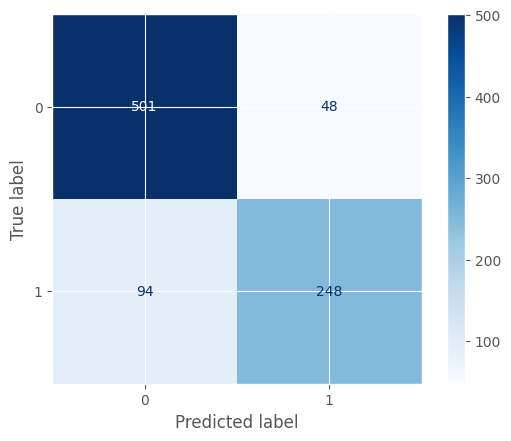

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(train_df_labels, train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
test_pred = svc_clf.predict(test_df_prepared)
submission_df = pd.DataFrame({'PassengerId': test_df.index + 892, 'Survived': test_pred})
submission_df.to_csv('submission.csv', index=False)